# Baseball case study

#### This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

#### Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#import dataset
df=pd.read_csv('baseball.csv')

In [3]:
#size
df.size

510

In [4]:
#first 5 rows
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


features: wins,Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

In [5]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
#check missing values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

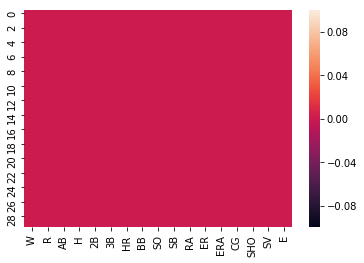

In [7]:
sns.heatmap(df.isnull())

doent contain null values

In [8]:
#check datatypes
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [9]:
#describe
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


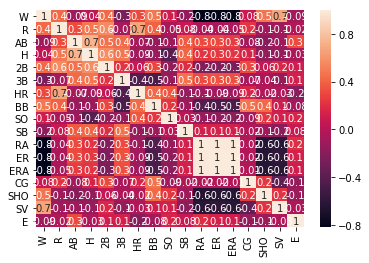

In [10]:
#check corr
sns.heatmap(df.corr(),annot=True,fmt='.1g')

In [11]:
#lets analyze target
df['W'].unique


<bound method Series.unique of 0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64>

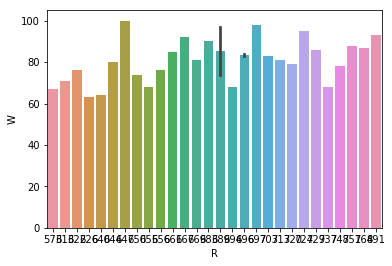

In [12]:
sns.barplot(x='R',y='W',data=df)

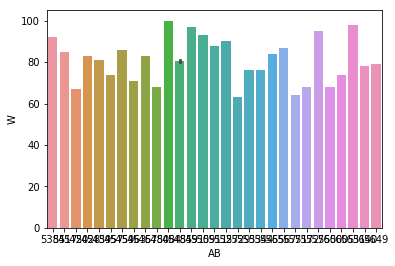

In [13]:
sns.barplot(x='AB',y='W',data=df)

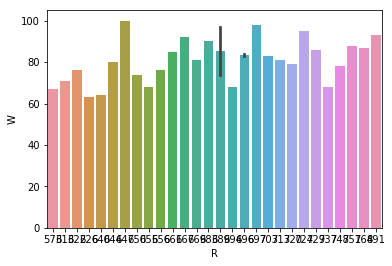

In [14]:
sns.barplot(x='R',y='W',data=df)

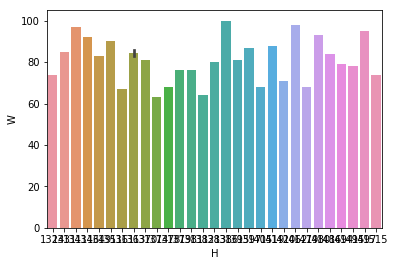

In [15]:
sns.barplot(x='H',y='W',data=df)

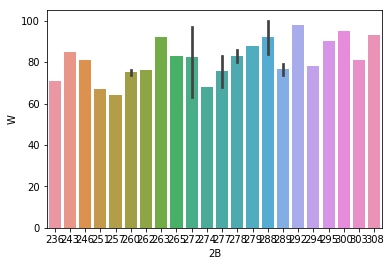

In [16]:
sns.barplot(x='2B',y='W',data=df)

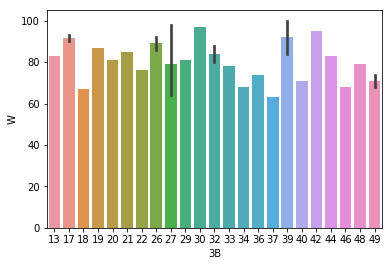

In [17]:
sns.barplot(x='3B',y='W',data=df)

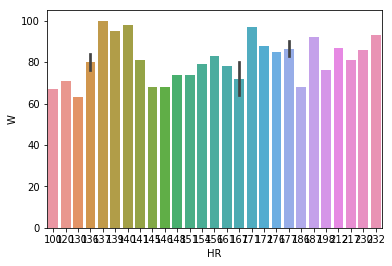

In [18]:
sns.barplot(x='HR',y='W',data=df)

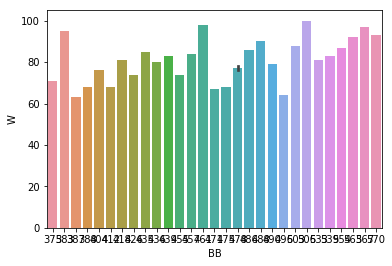

In [19]:
sns.barplot(x='BB',y='W',data=df)

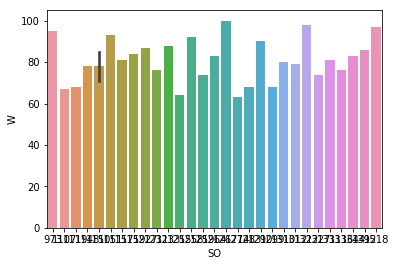

In [20]:
sns.barplot(x='SO',y='W',data=df)

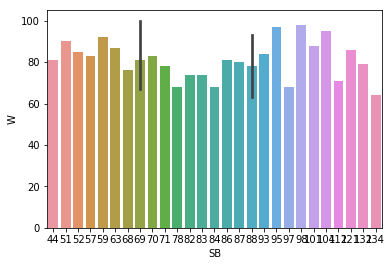

In [21]:
sns.barplot(x='SB',y='W',data=df)

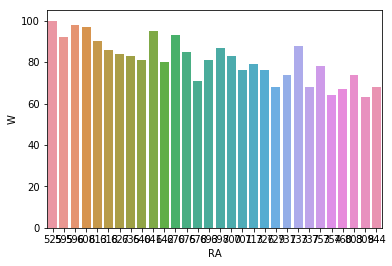

In [22]:
sns.barplot(x='RA',y='W',data=df)

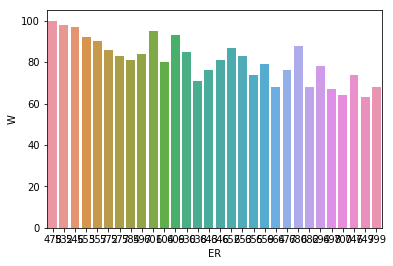

In [23]:
sns.barplot(x='ER',y='W',data=df)

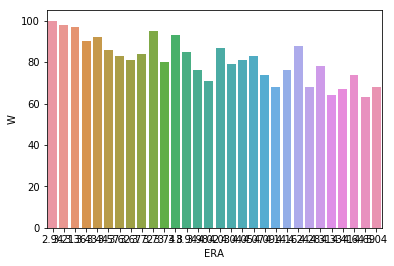

In [24]:
sns.barplot(x='ERA',y='W',data=df)

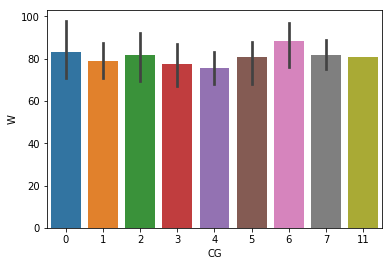

In [25]:
sns.barplot(x='CG',y='W',data=df)

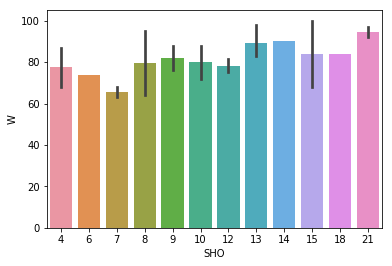

In [26]:
sns.barplot(x='SHO',y='W',data=df)

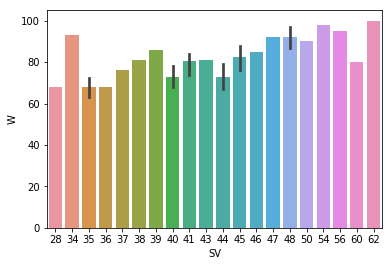

In [27]:
sns.barplot(x='SV',y='W',data=df)

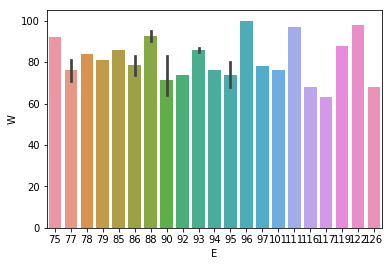

In [28]:
sns.barplot(x='E',y='W',data=df)

In [29]:
#check skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [30]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

# build model

In [31]:
x=df.iloc[:,1:17]
y=df['W']

In [32]:
x.shape,y.shape

((30, 16), (30,))

In [33]:
#scaling the imput variable
#Linearregression algorithm requires all features to be on common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def max_r2_score(clf,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print(clf,"max r2 score corresponding to ",final_r_state," is ",max_r_score)

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]
for m in model:
    max_r2_score(m,x,y)
    
    
    



LinearRegression() max r2 score corresponding to  48  is  0.892181586371697
DecisionTreeRegressor() max r2 score corresponding to  99  is  0.7650194791880255
RandomForestRegressor() max r2 score corresponding to  93  is  0.8166945352638957
KNeighborsRegressor() max r2 score corresponding to  97  is  0.7790697674418606


In [40]:
# Fitting Linear Regression Regression to the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 48,test_size=0.20)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('r2_score',r2_score(y_train, regressor.predict(x_train)))
rf_accuracy = round(regressor.score(x_train,y_train),2)
print('rf_accuracy:',rf_accuracy)

r2_score 0.947295491356568
rf_accuracy: 0.95


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='r2')
print(np.sqrt(np.abs(cv_score)))

[0.75618446 2.58638537 2.34098343 0.74223855 0.90393451]


In [42]:
#Lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  3.949396220296782
r2_score is:  0.892181586371697


In [43]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.tail()

,Actual,Predicted
3,76,79.319299
18,68,70.126839
24,63,58.868521
1,83,85.075922
15,100,96.329911


In [44]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(regressor, 'baseball.joblib') 


['baseball.joblib']